In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report

# Define your dataset directories in Kaggle
train_data_dir = '/kaggle/input/datasetmosquito/dataset/dataset/trainset'
val_data_dir = '/kaggle/input/datasetmosquito/dataset/dataset/testset'

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Load the dataset with data augmentation using ImageDataGenerator.flow_from_directory
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Load the validation dataset using image_dataset_from_directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

num_classes = len(train_ds.class_indices)
class_names = list(train_ds.class_indices.keys())

# Define the model
pretrained_model = Xception(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)

model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Unfreeze some layers for fine-tuning
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 35

# ModelCheckpoint callback to save the best model during training
checkpoint_path = '/kaggle/working/mosquito_model3.keras'  # Corrected filepath
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=False,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Get the model name
model_name = checkpoint_path.split('/')[-1]

# Print the model name along with its accuracy
print(f"Model {model_name} saved with Validation Accuracy: {max(history.history['val_accuracy']):.4f}")

# Calculate F1 score, precision, and recall
val_pred = model.predict(val_ds)
val_pred_classes = np.argmax(val_pred, axis=1)
val_true_classes = val_ds.classes
report = classification_report(val_true_classes, val_pred_classes, target_names=class_names, output_dict=True)

# Print F1 score, precision, and recall
print("F1 Score:", report['weighted avg']['f1-score'])
print("Precision:", report['weighted avg']['precision'])
print("Recall:", report['weighted avg']['recall'])

# Print highest values of accuracy, F1 score, precision, and recall
highest_accuracy = max(history.history['val_accuracy'])
highest_f1_score = report['weighted avg']['f1-score']
highest_precision = report['weighted avg']['precision']
highest_recall = report['weighted avg']['recall']

print("Highest Validation Accuracy:", highest_accuracy)
print("Highest F1 Score:", highest_f1_score)
print("Highest Precision:", highest_precision)
print("Highest Recall:", highest_recall)

# Plotting accuracy and loss in a single plot
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


Found 4000 images belonging to 10 classes.
Found 1000 files belonging to 10 classes.
Epoch 1/35


W0000 00:00:1713524866.794677      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.1695 - loss: 2.9694

W0000 00:00:1713524933.951579      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 124s 600ms/step - accuracy: 0.1699 - loss: 2.9668 - val_accuracy: 0.3070 - val_loss: 2.0581
Epoch 2/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 490ms/step - accuracy: 0.3963 - loss: 1.8300 - val_accuracy: 0.6360 - val_loss: 1.4549
Epoch 3/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 491ms/step - accuracy: 0.5491 - loss: 1.2869 - val_accuracy: 0.7030 - val_loss: 1.0244
Epoch 4/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 484ms/step - accuracy: 0.6618 - loss: 0.9615 - val_accuracy: 0.7640 - val_loss: 0.7103
Epoch 5/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 488ms/step - accuracy: 0.7270 - loss: 0.7533 - val_accuracy: 0.7990 - val_loss: 0.5552
Epoch 6/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 480ms/step - accuracy: 0.7677 - loss: 0.6527 - val_accuracy: 0.8360 - val_loss: 0.4543
Epoch 7/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 485ms/step - accuracy: 0.8044 - loss: 0.5609 - val_accuracy: 0.8600 - val_loss: 0.3769
Epoch 8/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 477ms/step - accuracy: 0.8303 - loss: 0.4740 - va

W0000 00:00:1713527056.079142      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step


AttributeError: '_PrefetchDataset' object has no attribute 'classes'

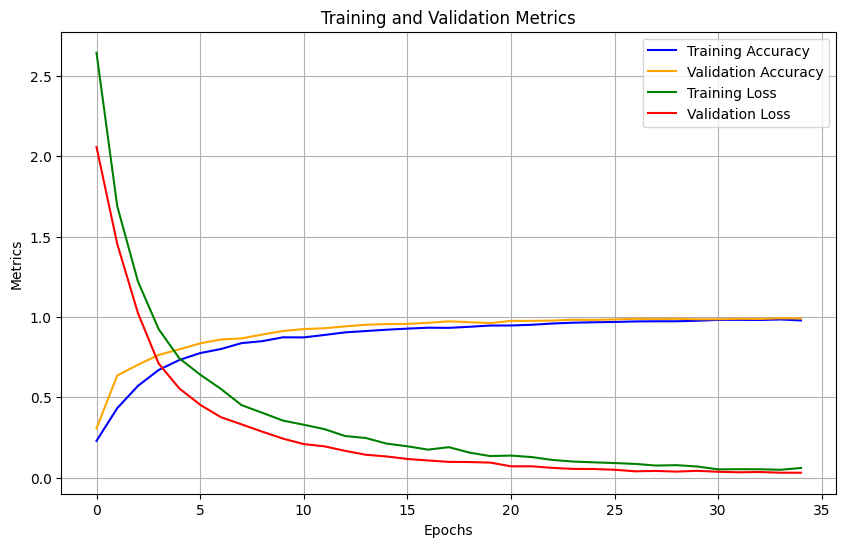

In [6]:


# Plotting accuracy and loss in a single plot
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the validation dataset with class labels
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Assuming y_true and y_pred are the true labels and predicted labels respectively
y_true = []
y_pred = []

for images, labels in val_ds:
    # Predict the labels for the batch of images
    batch_pred = model.predict(images)
    # Convert the predicted probabilities to class labels by selecting the class with the highest probability
    batch_pred_labels = np.argmax(batch_pred, axis=-1)
    # Append true labels and predicted labels for the batch
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Found 1000 files belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


W0000 00:00:1713527363.342360      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [9]:
# Print highest values of accuracy, F1 score, precision, and recall
highest_accuracy = max(history.history['val_accuracy'])
print("Highest Validation Accuracy:", highest_accuracy)


Highest Validation Accuracy: 0.9919999837875366


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

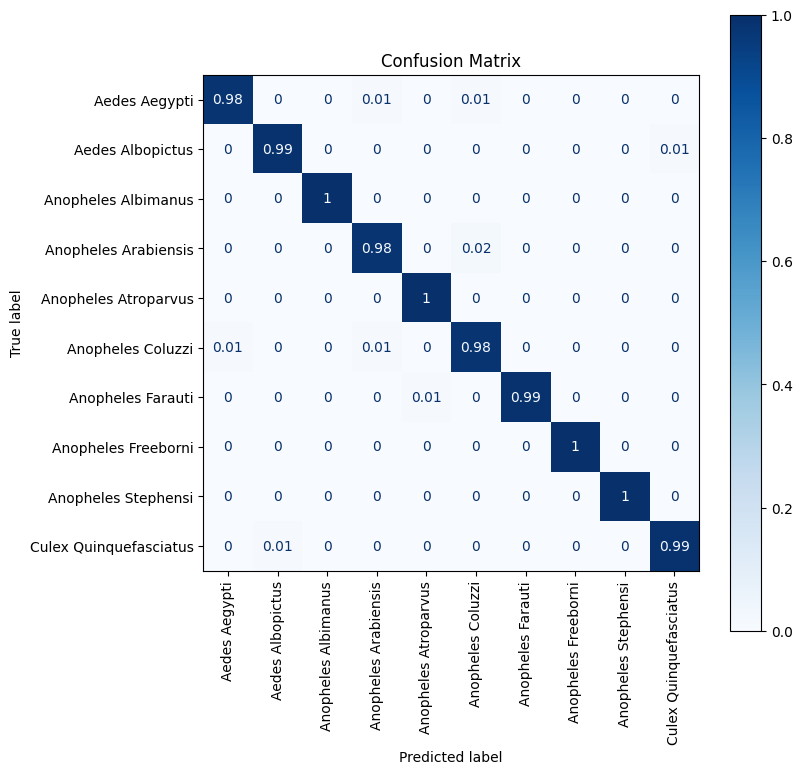

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names manually
class_names = ['Aedes Aegypti', 'Aedes Albopictus','Anopheles Albimanus','Anopheles Arabiensis','Anopheles Atroparvus','Anopheles Coluzzi','Anopheles Farauti','Anopheles Freeborni','Anopheles Stephensi', 'Culex Quinquefasciatus']

# Get the true labels and predictions for the validation set
val_true_labels = []
val_predictions = []

for images, labels in val_ds:
    val_true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    val_predictions.extend(np.argmax(predictions, axis=1))

# Create the confusion matrix
cm = confusion_matrix(val_true_labels, val_predictions, normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
